In [53]:
import pandas as pd
import re
import openpyxl
import matplotlib.pyplot as plt
import seaborn as sns


In [9]:
# !pip install --upgrade pandas openpyxl

### Leemos y preparamos el DataSet para su uso

In [48]:
# Cargar el libro de trabajo con openpyxl, pidiendo solo los datos
workbook = openpyxl.load_workbook("Datos_estadística.xlsx", data_only=True)
sheet = workbook.active 

# Extraer encabezados de la primera fila
headers = [cell.value for cell in sheet[1]]

# Extraer datos de las filas siguientes
data = []
for row_idx in range(2, sheet.max_row + 1): # Desde la segunda fila hasta el final
    row_values = [sheet.cell(row=row_idx, column=col_idx).value for col_idx in range(1, sheet.max_column + 1)]
    data.append(row_values)

# Crear el DataFrame de Pandas
df = pd.DataFrame(data, columns=headers)

# Eliminamos la columnas llena de "None"
df = df.iloc[:,:53]

# Limpiamos de espacios problemáticos, y los cambiamos por "_" para trabajar mejor con los nombres de las columnas.
column_names = df.columns
new_column_names = []

for col in column_names:
    # Eliminar espacios al principio y al final (strip())
    # Reemplazar cualquier secuencia de uno o más espacios (s+) por un guion bajo (_)
    # Usamos re.sub para manejar múltiples espacios como uno solo
    cleaned_col = re.sub(r'\s+', '_', col.strip())
    new_column_names.append(cleaned_col)

df.columns = new_column_names

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 799 entries, 0 to 798
Data columns (total 53 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   Block                                  799 non-null    int64  
 1   Position                               799 non-null    int64  
 2   Code                                   799 non-null    int64  
 3   Treatment                              799 non-null    int64  
 4   Replicate                              799 non-null    int64  
 5   Peso_de_muestra_vegetal_(g)            799 non-null    float64
 6   Cantidad_de_N_en_muestra_vegetal_(g)   799 non-null    float64
 7   Cantidad_de_C_en_muestra_vegetal_(g)   799 non-null    float64
 8   Porcentaje_N_de_la_muestra_vegetal     799 non-null    float64
 9   Porcentaje_C_de_la_muestra_vegetal     799 non-null    float64
 10  Peso_de_muestra_de_fruto_(g)           799 non-null    float64
 11  Cantid

In [49]:
df.loc[:,"Biomasa_total_fresca"]


0       905.650
1      1193.085
2       856.936
3       838.955
4       776.498
         ...   
794     681.616
795     502.215
796     432.179
797     304.105
798     442.367
Name: Biomasa_total_fresca, Length: 799, dtype: float64

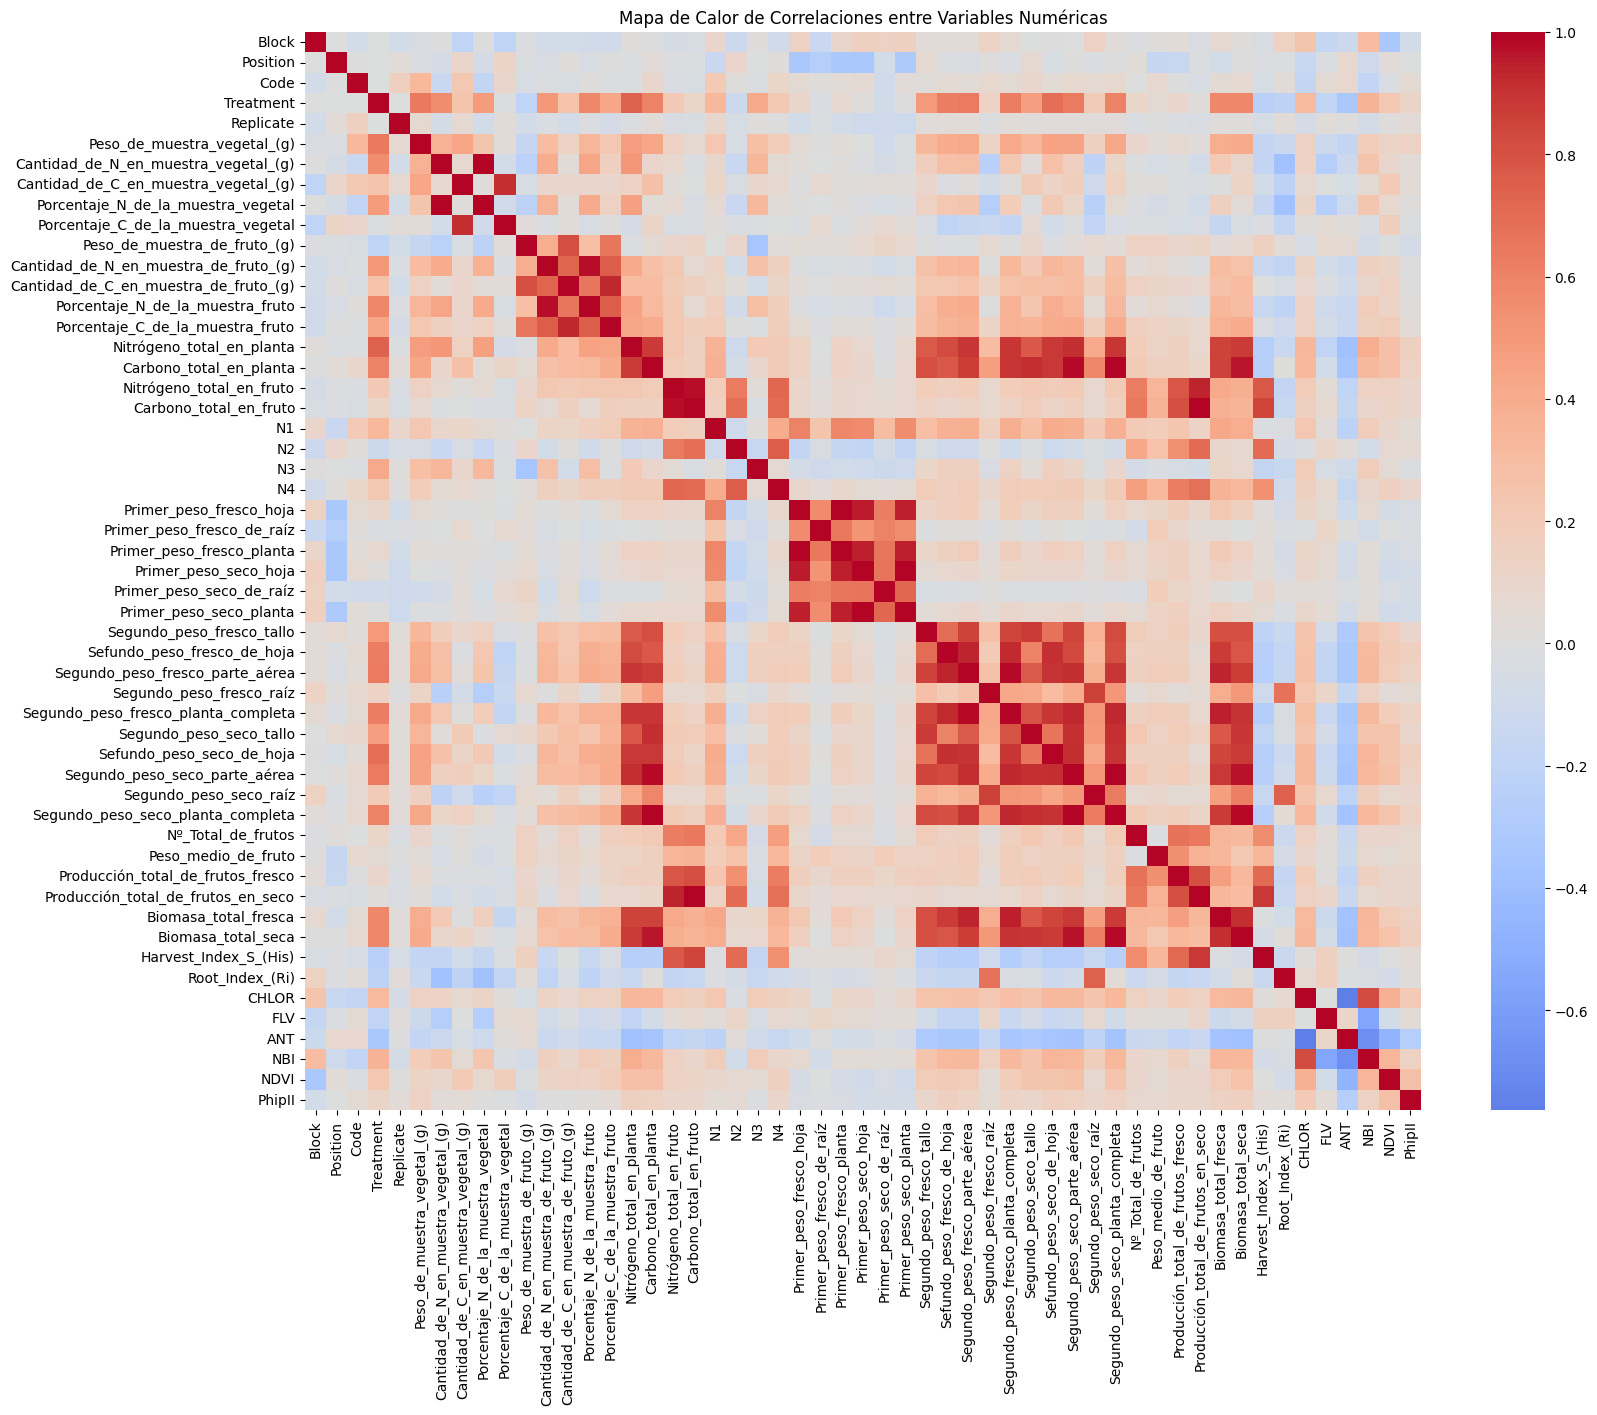

In [54]:
plt.figure(figsize=(18, 14))
corr_matrix = df.corr(numeric_only=True)
sns.heatmap(corr_matrix, annot=False, cmap='coolwarm', center=0)
plt.title("Mapa de Calor de Correlaciones entre Variables Numéricas")
plt.show()

In [55]:
# Buscar relaciones fuertes (|correlación| > 0.85), pero no 1.0
strong_corrs = []
threshold = 0.85

for i in range(len(corr_matrix.columns)):
    for j in range(i + 1, len(corr_matrix.columns)):
        col1 = corr_matrix.columns[i]
        col2 = corr_matrix.columns[j]
        corr_value = corr_matrix.iloc[i, j]
        if abs(corr_value) > threshold:
            strong_corrs.append((col1, col2, corr_value))

# Mostrar correlaciones fuertes ordenadas
strong_corrs_sorted = sorted(strong_corrs, key=lambda x: -abs(x[2]))
print("\n🔗 Correlaciones fuertes (|r| > 0.85):\n")
for col1, col2, val in strong_corrs_sorted:
    print(f"{col1:<25} <-> {col2:<25} | r = {val:.3f}")


🔗 Correlaciones fuertes (|r| > 0.85):

Primer_peso_seco_hoja     <-> Primer_peso_seco_planta   | r = 0.997
Primer_peso_fresco_hoja   <-> Primer_peso_fresco_planta | r = 0.994
Cantidad_de_N_en_muestra_vegetal_(g) <-> Porcentaje_N_de_la_muestra_vegetal | r = 0.992
Carbono_total_en_fruto    <-> Producción_total_de_frutos_en_seco | r = 0.989
Segundo_peso_seco_parte_aérea <-> Segundo_peso_seco_planta_completa | r = 0.989
Carbono_total_en_planta   <-> Segundo_peso_seco_planta_completa | r = 0.986
Segundo_peso_fresco_parte_aérea <-> Segundo_peso_fresco_planta_completa | r = 0.986
Carbono_total_en_planta   <-> Segundo_peso_seco_parte_aérea | r = 0.982
Segundo_peso_seco_planta_completa <-> Biomasa_total_seca        | r = 0.980
Cantidad_de_N_en_muestra_de_fruto_(g) <-> Porcentaje_N_de_la_muestra_fruto | r = 0.979
Nitrógeno_total_en_fruto  <-> Carbono_total_en_fruto    | r = 0.973
Segundo_peso_seco_parte_aérea <-> Biomasa_total_seca        | r = 0.969
Carbono_total_en_planta   <-> Biomasa_total_